# Introduction

## Introduction
In the spirit of the (2019-2020) NBA playoffs, I started this project named: "NBA Clustering", where I use machine learning to differentiate playoff teams, from non-playoff teams based on team stats/box-score.

Additionally, I wanted to get a better understanding of how to create and optimize models with scikit-learn. Scikit-learn is an open source machine learning library on python with a vast amount of machine learning tools. 

## Question

On the Toronto Raptors, the closest player to being a superstar is Kyle Lowry (it is arguable that he is a superstar).  Whereas other teams such as the LA Lakers have Lebron James, and Anthony Davis who are superstars without a doubt. 

However despite not having a superstar, or a player of a similar caliber to Lebron James, Kawhi Leonard, or others alike, the Toronto Raptors are playoff contenders who secured a playoff spot at the 2nd seed (in the 2019-2020, NBA season).

Knowing this sparked my curiosity of: **"What makes a team playoff contenders?"**

## Notebook Breakdown

The notebook is divided into the following sections: 

1. Sourcing the Data
2. Cleaning/Preprocessing Data
3. Explanatory Data Analysis (EDA)
4. Modelling
5. Conclusions

# Cleaning/Preprocessing Data


In [ ]:
# advance stats, using box score stats
def add_adv_stats(df):
    df["PPM"] = df["PTS"]/df["MP"] #Points per Minute
    df["POSS"] = 0.96*((df["FGA"]+df["TOV"])+(0.44*df["FTA"]-df["ORB"])) #Possession
    df["DRBP"] = df["DRB"]/(df["DRB"] + df.mean()["ORB"]) #Defensive Rebounding Percentage
    df["DE"] = 100*(df.mean()["PTS"]/df["POSS"]) #Defensive Efficiency
    df["OE"] = 100*(df["PTS"]/df["POSS"]) #Offensive Efficiency
    df["ED"] = df["OE"] - df["DE"] #Efficiency Differential
    df["TR"] = (df["TOV"] * 100) / (df["FGA"] + (df["FTA"]*44)+ df["AST"] + df["TOV"]) #Turnover Ratio
    df["EFG%"] = df["FG"] + (0.5*df["3P"]/df["FGA"]) # effective field goal %
    df["FTR"] = df["FTA"]/df["FGA"]  #Free Throw Rate - how often team shoots FT
    return df


## Cleaning/Preprocessing Data

### Cleaning/Preprocessing Data

To make the data easier to analyze and model, there are a couple of changes/additions made to the initial data set.

1. "Year" column was added
2. "Playoff" column was added
3. Renaming historical teams
4. Adding advanced stats columns

### Adding a "Year" Column

The yearly team stat table can be accessed on different pages/URLs, and there is no indication of the what year/season the stats are from. 

To combat this, a yearly column was added to the initial data set. Every time the team stats were recorded, the respective year was also recorded. 

Example) LA Lakers historical team stats

If the year column was not added, there would be 20 instances of LA Lakers which are undisguisable, and will be read as duplicates. 

If we were interested in only looking at the LA Lakers in the 80's then it would be difficult to differentiate the stats from the 80's Lakers from the 90's Lakers, but with the "Year" column, we could filter using the "Team" and "Year" column to get only the 80's Lakers stats. 

### Adding a "Playoff" Column

On Basketball Reference, an asterisks is added to the end a team name. For example, if the LA Lakers made the playoffs in that season it would appear as: *LA Lakers**, rather than *LA Lakers* (if they did not make the playoffs). 

This type of formatting poses 2 problems:

1. The team names *LA Lakers** and *LA Lakers* would be read as different teams because of the asterisks
2. Playoff indication of a team can be confusing, and would add difficulty of separating playoff teams from non-playoff teams

To solve both these problems, a "Playoff" column was added to the data set. For teams that had made the playoffs, the asterisks at end was removed, and was labelled with 1 in the "Playoff" column. For teams that had not made the playoffs were labelled as 0.

### Renaming Historical Teams

In NBA history, teams have been relocated, or more teams were added to the association and this shows in the data pulled from Basketball Reference. For example, the Charlotte Hornets are the latest team to relocate in 2013 to New Orleans, and are now known as the New Orleans Pelicans.

The differences in names, poses a problem when looking up a team's historical stats because when looking up teams under the new name, there will be gaps in the data although the team has the same roster as their former team name.

Fixing this issue was simple, we filtered through the data set by historical names, and replaced the historical team name with their current team name.

### Adding Advanced Statistics

The box score provides simple statistics, but can be used in combination with each other, providing a better indication of a team's offensive and defensive performance. More information about the advanced statistics can be found on [NBAstuffer](https://www.nbastuffer.com/analytics-101/)

To measure offensive performance better, these stats were added to the data set:

1. Points per minute 
2. [Possession](https://www.nbastuffer.com/analytics101/possession/)
3. [Offensive efficiency](https://www.nbastuffer.com/analytics101/offensive-efficiency/)
4. [Effective field goal %](https://www.nbastuffer.com/analytics101/effective-field-goal-percentage-efg/)
5. [Free throw Rate](https://www.nbastuffer.com/analytics101/free-throw-rate/)

To measure defensive performance better, these stats were added to the data set:

1. [Defensive rebounding percentage](https://www.nbastuffer.com/analytics101/defensive-rebounding-percentage/)
2. [Defensive efficiency](https://www.nbastuffer.com/analytics101/defensive-efficiency/) 

To measure overall performance better, these stats were added to the data set:

1. [Efficiency differential](https://www.nbastuffer.com/analytics101/efficiency-differential/) 
2. [Turnover ratio](https://www.nbastuffer.com/analytics101/turnover-ratio/)


## Creating Reusable Functions (OPTIONAL READ)

These reusable functions are mainly for graphing

In [ ]:
from matplotlib import pyplot
def compare_two_groups(df1, df2, vars, n_rows, n_cols):
        fig=plt.figure(figsize=(15,15), facecolor="white")
        for i, var_name in enumerate(vars):
            ax=fig.add_subplot(n_rows,n_cols,i+1)
            df1[var_name].hist(bins=20, ax=ax, label="df1") # for histogram
            df2[var_name].hist(bins=20, ax=ax, label="df2") # for histogram
            ax.set_title(var_name+" Distribution")
            pyplot.legend(loc="upper right")
        plt.tight_layout()
        plt.show()

In [ ]:
def f_importances(coef, names):
    plt.figure(figsize=(15,15), facecolor="white")
    imp = coef[0]
    imp,names = zip(*sorted(zip(imp,names)))
    plt.title("Feature Importance")
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.grid(True)
    plt.show()

In [ ]:
def time_series_stat(df, vars, n_rows,n_cols):
    fig=plt.figure(figsize=(15,15), facecolor="white")
    
    playoff = df[df["Playoff"] == 1]
    non_playoff = df[df["Playoff"] == 0]
    years = df["Year"].unique()

    for i, var_name in enumerate(vars):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        ax.set_title(var_name+" Time Series")
        playoff_data=[]
        non_playoff_data=[]
        for year in years:
            playoff_average = playoff[playoff["Year"] == year][var_name].mean()
            non_playoff_average = non_playoff[non_playoff["Year"] == year][var_name].mean()
            playoff_data.append(playoff_average)
            non_playoff_data.append(non_playoff_average)
        ax.plot(years, playoff_data)
        ax.plot(years, non_playoff_data)
        ax.grid(True)

    
    plt.tight_layout()
    fig.legend(["Playoff", "Non Playoff"], loc='lower right', fontsize="x-large", bbox_to_anchor=(0.98, 0.025))
    plt.show()

### Entire Dataset Functions - from 1980-2019

In [ ]:
import matplotlib.pyplot as plt
def compare_decades_boxplots(df_dict, variables, n_rows, n_cols):
    """
    => create boxplots of all variables passed in
    => df_dict, data should be a dictionary with => decade: df 
    """

    fig=plt.figure(figsize=(25,25), facecolor="white")

    # get the desired variable first
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        ax.set_title(var_name +" Box Plot")
        ax.yaxis.grid(True)
        ax.set_xlabel('Decade')
        ax.set_ylabel('Observed values')
        data=[]
        # get selected variable from each dataframe
        for decade, dataframe in df_dict.items():
            data.append(dataframe[var_name])

        ax.boxplot(data, labels=df_dict.keys())

    plt.tight_layout()
    plt.show()

### Decade Functions

In [ ]:
import seaborn as sns
def single_heatmap(df):
    """
    => create a single heatmap with all variables in df
    """
    sns.set(style="white")
    corr = df.select_dtypes("float64").corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)]=True

    ax = plt.subplots(figsize=(25,25))
    ax = sns.heatmap(corr, annot=True,  linewidths=0.5, cmap="coolwarm", square=True, mask=mask)

    plt.show()

In [ ]:
def single_histogram(df, variables, n_rows=7, n_cols=5):
    """
    => create histograms for each variable passed in from the df 
    """
    fig=plt.figure(figsize=(15,15), facecolor='white')
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=20,ax=ax)
        ax.set_title(var_name+" Distribution")
        ax.set_xlabel("%s" % var_name)
        ax.set_ylabel('Observed values')
        plt.tight_layout()
    
    plt.show()

In [ ]:
def compare_playoff_count(df):
    grouped = count_decade_playoffs(df)
    plt.figure(figsize=(15,10), facecolor="white")
    plt.bar(grouped["Team"], grouped["Playoff"])
    plt.xticks(rotation=90)
    plt.ylabel('# of Playoff Appearances')
    plt.xlabel('Team')
    plt.title('Playoff Appearances Between {}-{}'.format(df["Year"].min(), df["Year"].max()))
    plt.tight_layout()
    plt.show()

In [ ]:
def get_team_decade_stats(team, decade, n_rows=5, n_cols=5): 
    """
    => get all stats for selected team in wanted decade
    """
    decade_df = decade_dict["{}'s".format(decade)]
    stat_cols = decade_df.select_dtypes("float64").columns
    team_df = decade_df.loc[decade_df["Team"] == team]
    team_stat_df = team_df[stat_cols]

    fig=plt.figure(figsize=(25,25), facecolor="white")

    # get the desired variable first
    for i, var_name in enumerate(stat_cols):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        ax.set_title(var_name +" Box Plot")
        ax.yaxis.grid(True)
        ax.set_xlabel(var_name)
        ax.set_ylabel('Observed values')
        ax.get_xaxis().set_visible(False)
        
        ax.boxplot(team_stat_df[var_name])
    fig.suptitle("{}'s in the {}'s".format(team, decade), size=25)
    plt.tight_layout()
    fig.subplots_adjust(top=0.95)
    plt.show()

In [ ]:
def count_decade_playoffs(df):
    all_time_playoffs = (df.groupby(["Team"]).sum())["Playoff"].reset_index()
    return all_time_playoffs

## Dataset Breakdown

To make the data more accessible by the decade, I further broke down the data set into a dictionary with the decade as the key, and a data set to the respective decade. For example, calling *decade_dict["1980's"]* would return the data set containing all the data from 1980-1989.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
main_og = pd.read_csv("/content/drive/My Drive/ML/nba_clustering/datasets/renamed_teams.csv")
main_df = add_adv_stats(main_og)
main_df.head()

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Playoff,PPM,POSS,DRBP,DE,OE,ED,TR,EFG%,FTR
0,1,San Antonio Spurs,82,240.9,47.0,94.4,0.498,0.6,2.5,0.252,46.4,91.9,0.505,24.7,30.8,0.801,14.1,30.7,44.7,28.4,9.4,4.1,19.4,25.6,119.4,1980,1,0.495641,108.72192,0.711776,93.749261,109.821460,16.072199,1.295579,47.003178,0.326271
1,2,Los Angeles Lakers,82,242.4,47.5,89.9,0.529,0.2,1.2,0.200,47.3,88.6,0.534,19.8,25.5,0.775,13.2,32.4,45.6,29.4,9.4,6.7,20.0,21.8,115.1,1980,1,0.474835,103.60320,0.722706,98.381128,111.096955,12.715827,1.585666,47.501112,0.283648
2,3,Cleveland Cavaliers,82,243.0,46.5,98.1,0.474,0.4,2.3,0.193,46.0,95.8,0.481,20.8,26.9,0.772,15.9,29.0,45.0,25.7,9.3,4.2,16.7,23.6,114.1,1980,0,0.469547,106.30656,0.699950,95.879310,107.331100,11.451790,1.261234,46.502039,0.274210
3,4,New York Knicks,82,241.2,46.4,93.6,0.496,0.5,2.3,0.220,45.9,91.2,0.503,20.7,27.7,0.747,15.1,28.1,43.2,27.6,10.7,5.6,19.7,26.4,114.0,1980,0,0.472637,105.97248,0.693288,96.181571,107.575099,11.393527,1.448849,46.402671,0.295940
4,5,Boston Celtics,82,242.4,44.1,90.1,0.490,2.0,5.1,0.384,42.1,84.9,0.496,23.3,29.9,0.779,15.0,30.0,44.9,26.8,9.9,3.8,18.8,24.1,113.5,1980,1,0.468234,102.77376,0.707022,99.175117,110.436750,11.261633,1.295390,44.111099,0.331853


In [ ]:
"""
split main
    => yearly_index[0] = 1980-81 NBA season team stats
    => yearly_index[39] = 2018-19 NBA season team stats
"""
yearly_dfs = [x for _, x in main_df.groupby("Year")]

In [ ]:
# sort data by decade
bins = [-1, 1989, 1999, 2009, 2019]
labels = ["1980's", "1990's","2000's","2010's"]
binned_df = main_df.groupby(pd.cut(main_df['Year'], bins=bins, labels=labels))
binned_df.head(3)

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Playoff,PPM,POSS,DRBP,DE,OE,ED,TR,EFG%,FTR
0,1,San Antonio Spurs,82,240.9,47.0,94.4,0.498,0.6,2.5,0.252,46.4,91.9,0.505,24.7,30.8,0.801,14.1,30.7,44.7,28.4,9.4,4.1,19.4,25.6,119.4,1980,1,0.495641,108.72192,0.711776,93.749261,109.821460,16.072199,1.295579,47.003178,0.326271
1,2,Los Angeles Lakers,82,242.4,47.5,89.9,0.529,0.2,1.2,0.200,47.3,88.6,0.534,19.8,25.5,0.775,13.2,32.4,45.6,29.4,9.4,6.7,20.0,21.8,115.1,1980,1,0.474835,103.60320,0.722706,98.381128,111.096955,12.715827,1.585666,47.501112,0.283648
2,3,Cleveland Cavaliers,82,243.0,46.5,98.1,0.474,0.4,2.3,0.193,46.0,95.8,0.481,20.8,26.9,0.772,15.9,29.0,45.0,25.7,9.3,4.2,16.7,23.6,114.1,1980,0,0.469547,106.30656,0.699950,95.879310,107.331100,11.451790,1.261234,46.502039,0.274210
231,1,Golden State Warriors,82,240.3,42.5,87.9,0.484,3.0,9.1,0.324,39.6,78.8,0.503,28.2,34.9,0.809,11.2,29.1,40.2,24.1,9.2,6.0,17.3,24.5,116.3,1990,0,0.483978,104.98176,0.700673,97.089243,110.781149,13.691906,1.039101,42.517065,0.397042
232,2,Phoenix Suns,82,242.1,43.2,87.1,0.496,2.1,6.6,0.324,41.1,80.4,0.511,26.3,33.1,0.795,12.8,32.3,45.2,25.7,8.1,6.1,15.5,22.3,114.9,1990,1,0.474597,100.18944,0.722086,101.733273,114.682745,12.949472,0.978103,43.212055,0.380023
233,3,Denver Nuggets,82,241.5,45.3,97.7,0.464,2.8,8.3,0.337,42.5,89.5,0.475,21.2,26.8,0.789,14.3,30.9,45.1,27.7,9.9,4.0,13.9,25.0,114.6,1990,1,0.474534,104.72832,0.713107,97.324197,109.425989,12.101792,1.054228,45.314330,0.274309
509,1,Sacramento Kings,82,241.5,40.0,88.9,0.450,6.5,20.2,0.322,33.4,68.7,0.487,18.5,24.6,0.754,12.9,32.1,45.0,23.8,9.6,4.6,16.2,21.1,105.0,2000,1,0.434783,98.90304,0.720838,103.056485,106.164583,3.108098,1.337406,40.036558,0.276715
510,2,Detroit Pistons,82,241.8,37.1,80.9,0.459,5.4,14.9,0.359,31.8,66.0,0.481,23.9,30.6,0.781,11.2,30.0,41.2,20.8,8.1,3.3,15.7,24.5,103.5,2000,1,0.428040,94.90944,0.707022,107.392896,109.051323,1.658427,1.072551,37.133375,0.378245
511,3,Dallas Mavericks,82,240.6,39.0,85.9,0.453,6.3,16.2,0.391,32.6,69.8,0.468,17.2,21.4,0.804,11.4,29.8,41.2,22.1,7.2,5.1,13.7,21.6,101.4,2000,0,0.421446,93.71136,0.705634,108.765892,108.204598,-0.561294,1.288442,39.036671,0.249127
804,1,Phoenix Suns,82,240.6,40.7,82.8,0.492,8.9,21.6,0.412,31.8,61.2,0.520,19.9,25.8,0.770,11.1,31.9,43.0,23.3,5.8,5.1,14.8,20.9,110.2,2010,1,0.458022,93.93792,0.719578,108.503570,117.311518,8.807949,1.178250,40.753744,0.311594


In [ ]:
"""
    => extracting the binned data from binned_df
    => accessible by indexing their labels, refer to binned_df code block

    => structure: {key: dataframe}
"""
decade_dict = dict(list(binned_df))
decade_dict["1980's"].head() # getting the 80's data

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Playoff,PPM,POSS,DRBP,DE,OE,ED,TR,EFG%,FTR
0,1,San Antonio Spurs,82,240.9,47.0,94.4,0.498,0.6,2.5,0.252,46.4,91.9,0.505,24.7,30.8,0.801,14.1,30.7,44.7,28.4,9.4,4.1,19.4,25.6,119.4,1980,1,0.495641,108.72192,0.711776,93.749261,109.821460,16.072199,1.295579,47.003178,0.326271
1,2,Los Angeles Lakers,82,242.4,47.5,89.9,0.529,0.2,1.2,0.200,47.3,88.6,0.534,19.8,25.5,0.775,13.2,32.4,45.6,29.4,9.4,6.7,20.0,21.8,115.1,1980,1,0.474835,103.60320,0.722706,98.381128,111.096955,12.715827,1.585666,47.501112,0.283648
2,3,Cleveland Cavaliers,82,243.0,46.5,98.1,0.474,0.4,2.3,0.193,46.0,95.8,0.481,20.8,26.9,0.772,15.9,29.0,45.0,25.7,9.3,4.2,16.7,23.6,114.1,1980,0,0.469547,106.30656,0.699950,95.879310,107.331100,11.451790,1.261234,46.502039,0.274210
3,4,New York Knicks,82,241.2,46.4,93.6,0.496,0.5,2.3,0.220,45.9,91.2,0.503,20.7,27.7,0.747,15.1,28.1,43.2,27.6,10.7,5.6,19.7,26.4,114.0,1980,0,0.472637,105.97248,0.693288,96.181571,107.575099,11.393527,1.448849,46.402671,0.295940
4,5,Boston Celtics,82,242.4,44.1,90.1,0.490,2.0,5.1,0.384,42.1,84.9,0.496,23.3,29.9,0.779,15.0,30.0,44.9,26.8,9.9,3.8,18.8,24.1,113.5,1980,1,0.468234,102.77376,0.707022,99.175117,110.436750,11.261633,1.295390,44.111099,0.331853


# EDA

## Stat Distribution

### Stat Distributions

To get a better understanding of the data set, lets look at how each of the variables are distributed. 

In [ ]:
main_df.describe()

,Rk,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Playoff,PPM,POSS,DRBP,DE,OE,ED,TR,EFG%,FTR
count,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000
mean,14.442029,80.722826,241.702627,38.752989,83.801268,0.461997,4.941304,14.085326,0.332275,33.814583,69.716123,0.485088,19.476721,25.831612,0.754239,12.431522,30.256884,42.686141,23.069293,8.062409,5.068388,15.540308,22.321014,101.925996,2000.559783,0.565217,0.421714,94.344925,0.708088,108.314906,107.994892,-0.320014,1.241314,38.782834,0.308698
std,8.193506,5.679342,0.840499,3.301491,4.645912,0.021420,3.064903,8.223425,0.047597,5.355127,10.486057,0.022143,2.558868,3.263550,0.028997,1.968778,2.106117,2.107388,2.620352,1.091054,0.959736,1.829940,2.323730,7.017021,11.313390,0.495953,0.029203,4.851442,0.014172,5.449289,3.968643,7.367065,0.131456,3.292918,0.038557
min,1.000000,50.000000,240.000000,30.800000,71.200000,0.401000,0.100000,0.900000,0.104000,23.100000,41.900000,0.421000,12.200000,16.600000,0.660000,7.600000,24.900000,35.600000,15.600000,5.500000,2.400000,11.200000,16.600000,81.900000,1980.000000,0.000000,0.339130,81.699840,0.666997,90.019766,92.671837,-22.891332,0.927094,30.822816,0.193961
25%,7.000000,82.000000,241.200000,36.300000,80.475000,0.447000,2.400000,7.400000,0.319000,29.900000,62.000000,0.470000,17.600000,23.500000,0.737000,11.000000,28.900000,41.200000,21.075000,7.300000,4.400000,14.200000,20.600000,96.800000,1991.000000,0.000000,0.400000,90.707520,0.699224,104.206537,105.374168,-5.630136,1.151668,36.336351,0.282265
50%,14.000000,82.000000,241.500000,38.300000,83.500000,0.460500,5.000000,14.100000,0.345500,31.800000,66.500000,0.484500,19.200000,25.700000,0.755000,12.300000,30.000000,42.700000,22.800000,8.000000,5.000000,15.200000,22.200000,101.400000,2001.000000,1.000000,0.419669,93.550080,0.707022,108.953404,107.832716,-0.544198,1.233307,38.333737,0.307318
75%,21.000000,82.000000,242.100000,41.100000,87.100000,0.476000,6.900000,19.300000,0.363000,38.500000,79.000000,0.499000,21.200000,28.100000,0.773000,13.800000,31.500000,44.125000,24.900000,8.700000,5.600000,16.600000,23.900000,106.725000,2010.000000,1.000000,0.441824,97.811520,0.717025,112.367747,110.762835,4.979590,1.327751,41.142799,0.335698
max,30.000000,82.000000,244.900000,48.500000,108.100000,0.545000,16.100000,45.400000,0.428000,48.200000,96.000000,0.565000,29.100000,37.200000,0.832000,18.500000,40.400000,49.700000,31.400000,12.800000,8.700000,22.800000,29.700000,126.500000,2019.000000,1.000000,0.523160,113.226240,0.764695,124.756666,118.600223,22.598630,1.702078,48.502677,0.432215


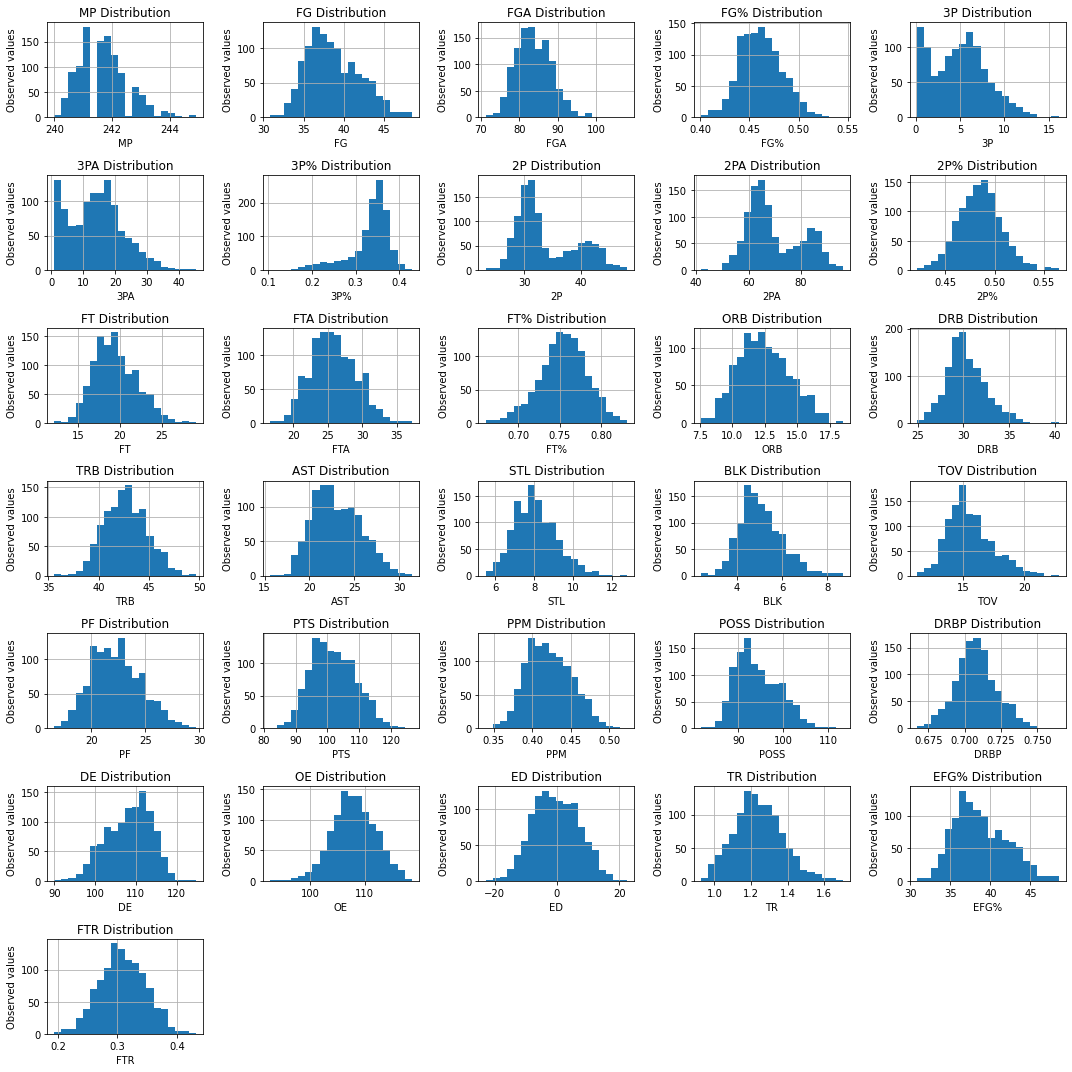

In [ ]:
# total distribution of stats throughout 1980-2019
all_float_vars = main_df.select_dtypes(include=["float64"]).columns
single_histogram(main_df, all_float_vars, 7, 5)

Majority of the data is normally distributed, leaving only some skewed. A great example would be the 3 point shot. 

From the beginning of the NBA, every field goal counted for 2 points. However in 1979, the NBA introduced the 3 point shot. 

To demonstrate the differences in stat distribution between the 2 point field goals, and 3 point field goals, let's look at the introduction of the 3 point line in 1979. Before 1979, the NBA would count all field goals for 2 points. 

In the 80's and 90's the NBA has seen the greats play such as Michael Jordan, Magic Johnson, Larry Bird, and many others. During this time, most the shots taken, were mid range, or under the net (dunks/layups), all counting for 2 points. Rarely did teams shoot the 3 point shot.
This observation is supported by the histograms, where the 2PA, 2P are bimodal with the left maxima being larger than the right, and the 3PA, 3P are heavily right skewed.

As of recently, players like Stephen Curry, Damian Lillard, and James Harden have added the 3 point shot to their arsenal and shoot the 3 pointer often with relatively high percentages. The increased frequency of 3 pointers, means less 2 pointers are attempted. This further explains the bimodal distributions seen in 2PA, and 2P. The bimodal distribution can be seen as the shift from shooting less 2 pointers and more 3 pointers. 

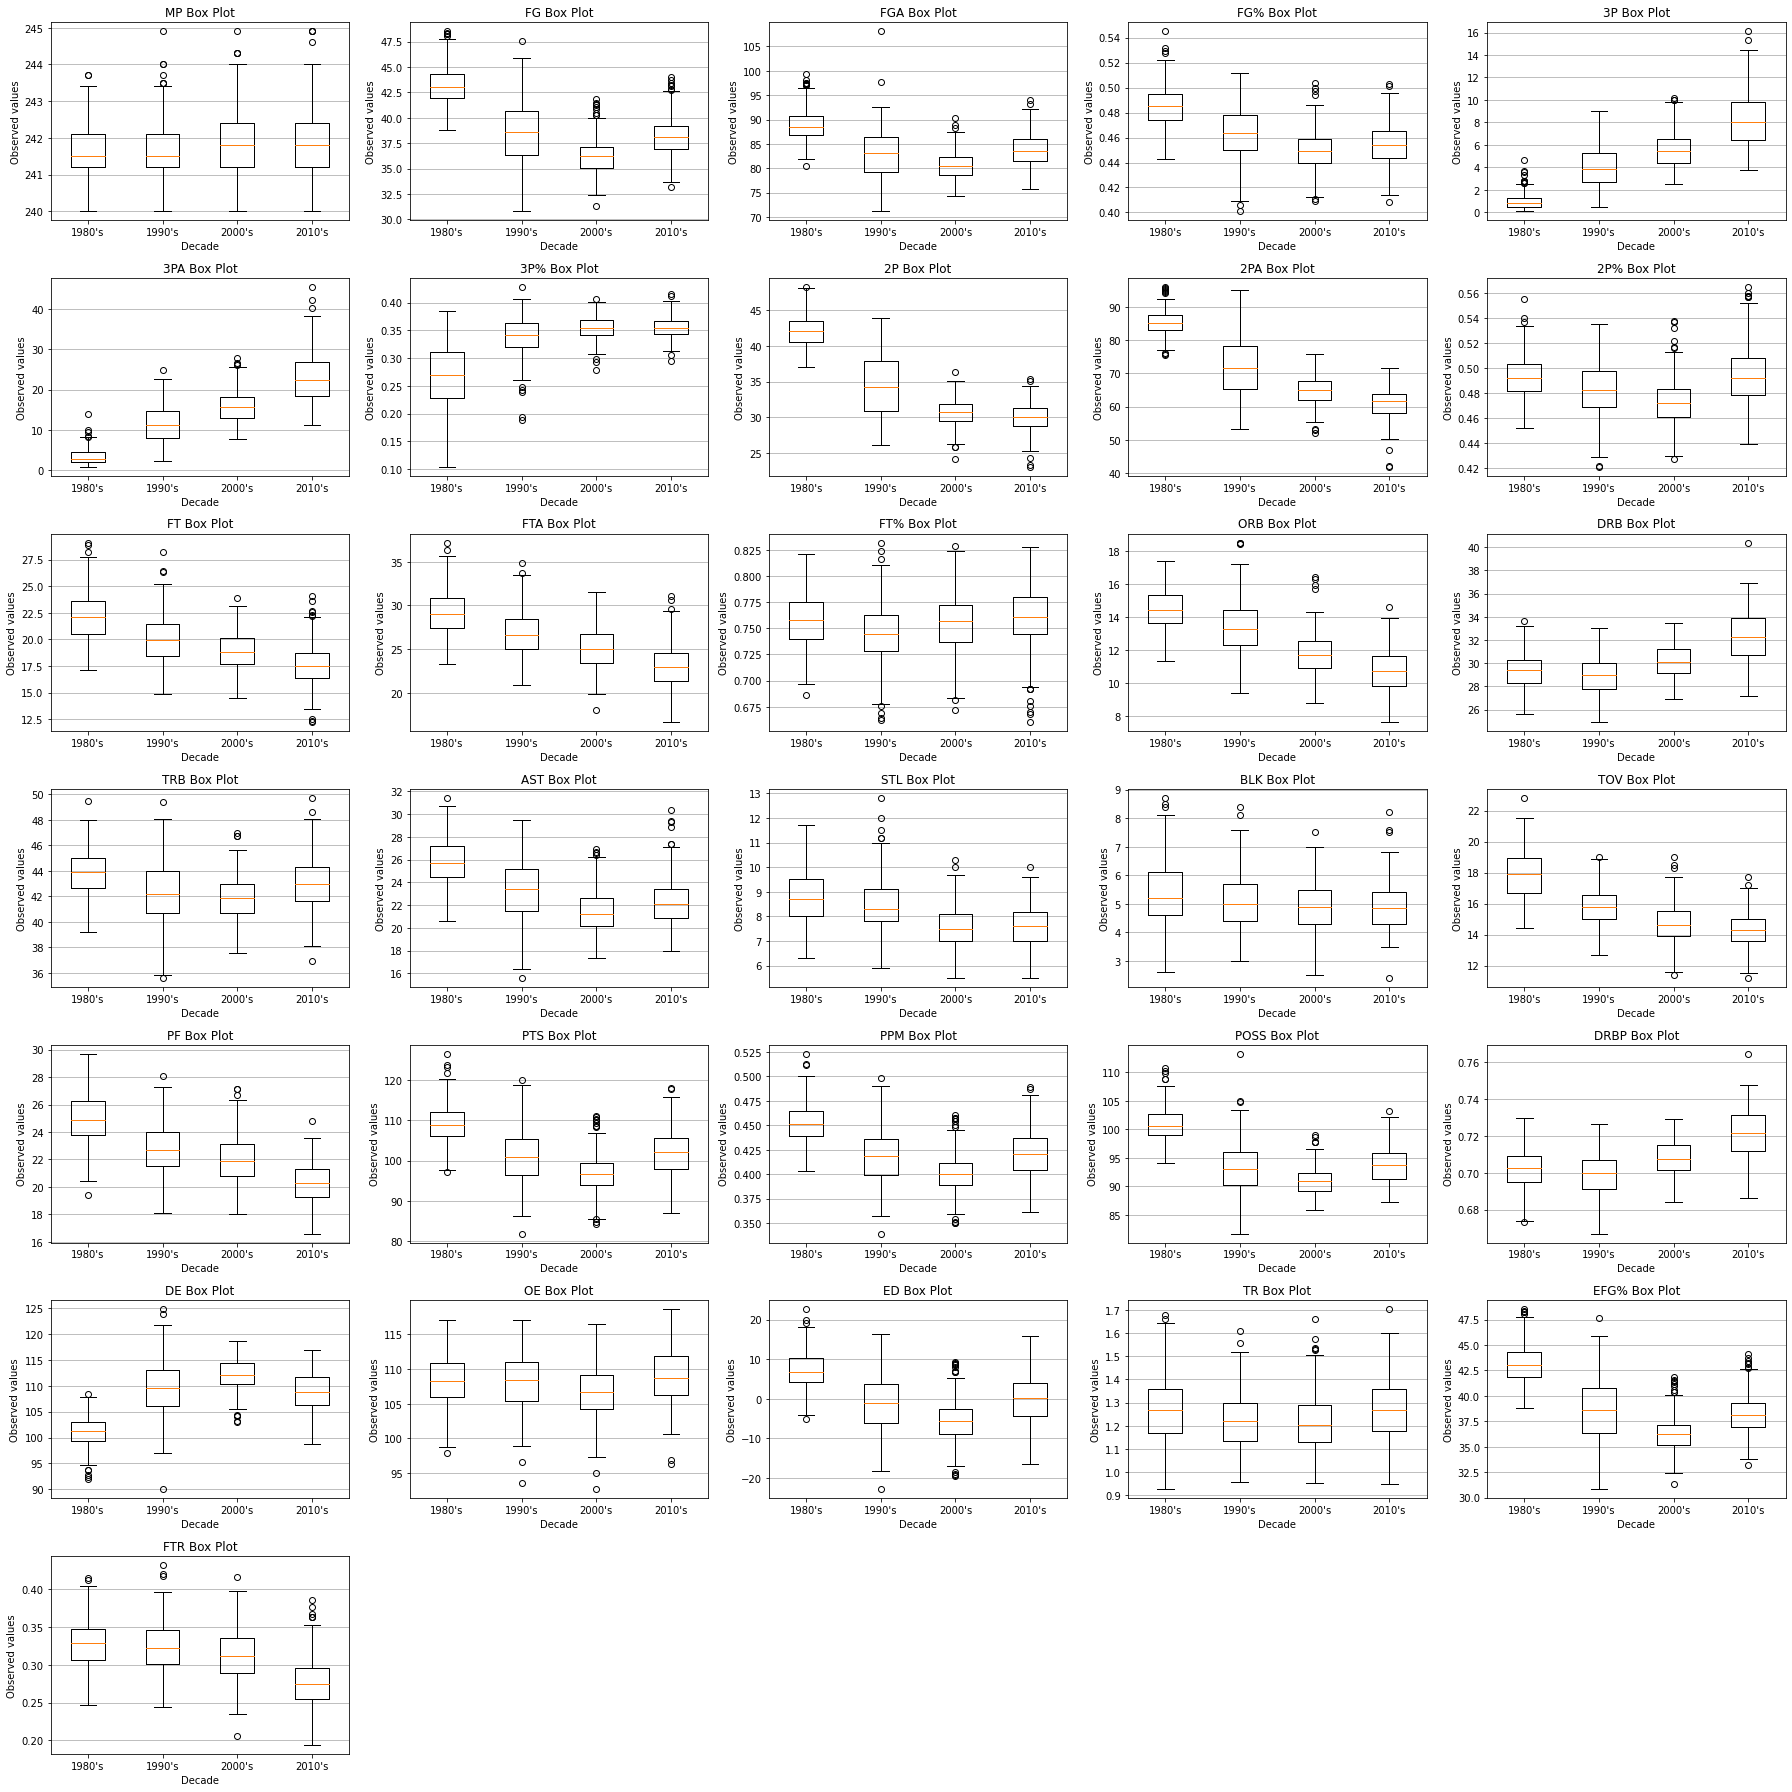

In [ ]:
all_float_vars = main_df.select_dtypes(include=["float64"]).columns
compare_decades_boxplots(decade_dict, all_float_vars, 7,5)

Taking both these observations, lets compare the 3 point related stats with the 2 point related stats between the 1980's and 2010's.

For 3 point stats, the teams in the 1980's usually shot 2-4 3 pointers a game (3PA) and would make 1-2 of those shots (3P) - having a percentage in the range of 22-31% (3P%). 

Whereas, teams in the 2010's shoot 19-26 3 pointers a game (6-8x more in 2010's), and would make 7-10 of those shots - having a percentage of in the range of 33-36%.

For 2 point stats, the teams in the 1980's usually shot 82-88 2 pointers a game (2PA) and would make 40-43 of those shots - having a percentage around 48-50%.

For teams in the 2010's, 58-62 2 pointers were shot, and 28-31 shots went in - having a percentage of around 48-51%, similar to the 1980s. 

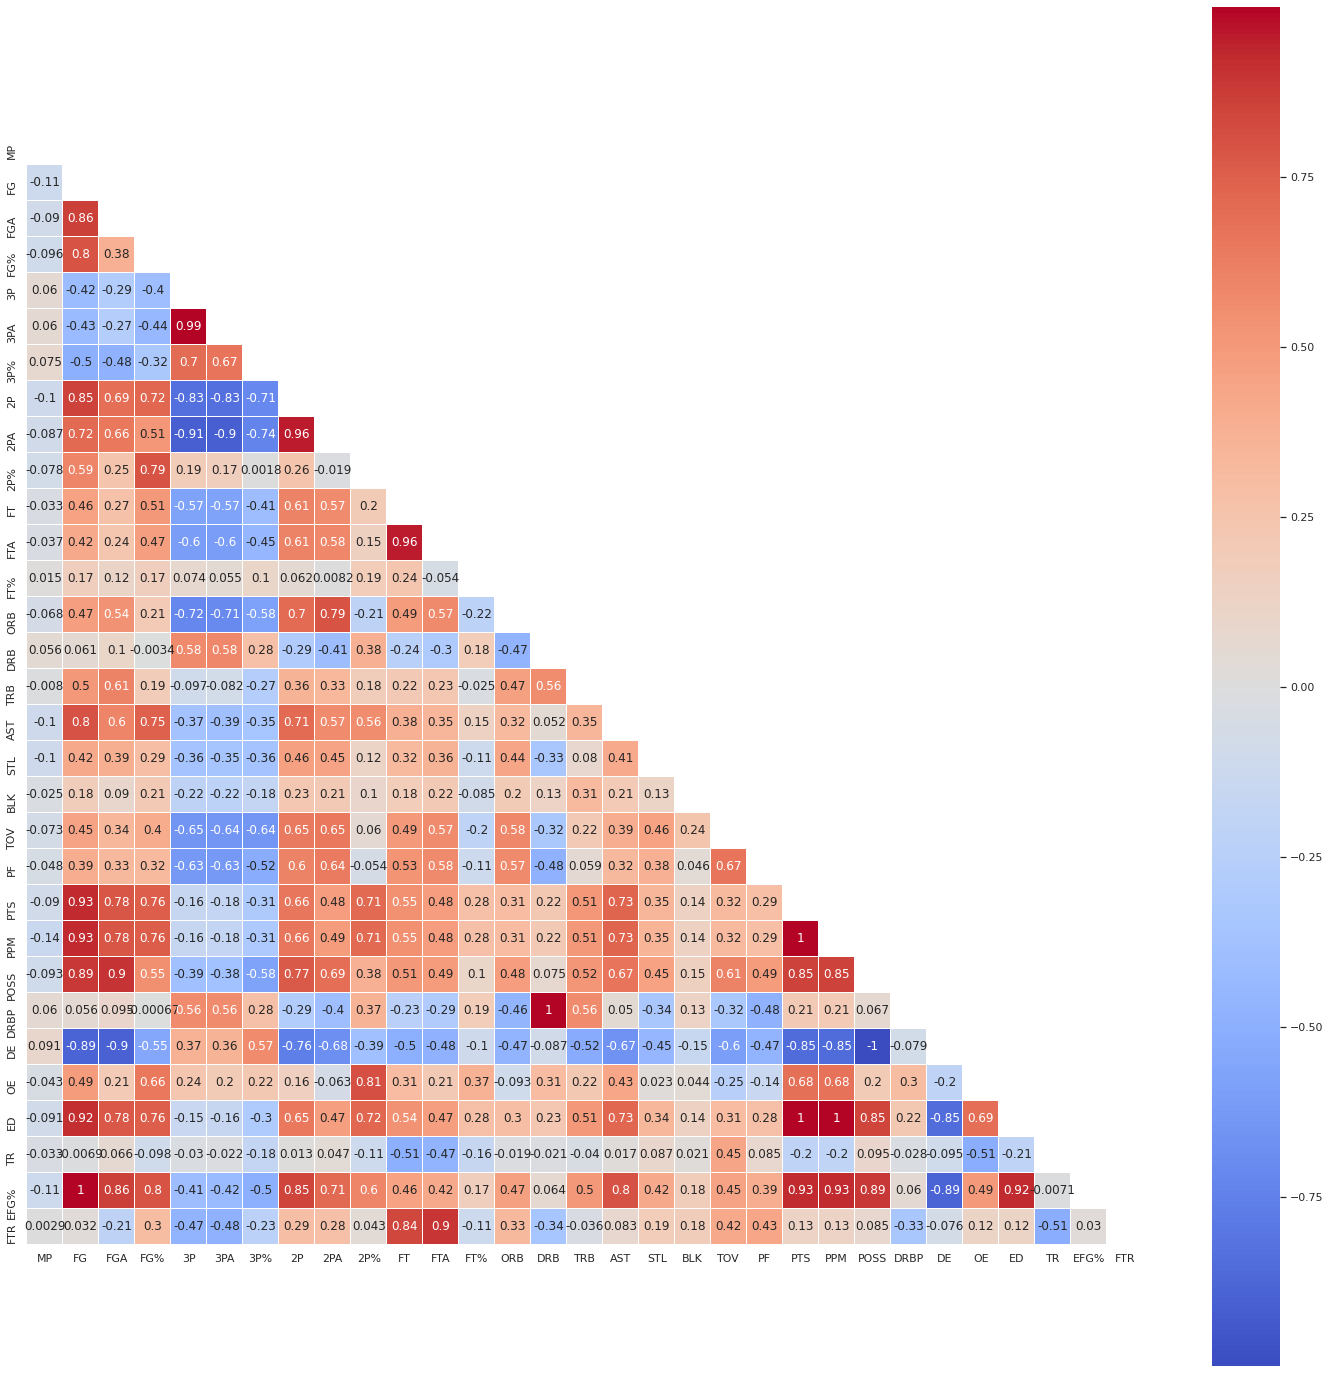

In [ ]:
single_heatmap(main_df)

In [ ]:
counted = count_decade_playoffs(main_df)
counted

,Team,Playoff
0,Atlanta Hawks,26
1,Boston Celtics,30
2,Brooklyn Nets,19
3,Charlotte Hornets,10
4,Chicago Bulls,26
5,Cleveland Cavaliers,19
6,Dallas Mavericks,21
7,Denver Nuggets,22
8,Detroit Pistons,23
9,Golden State Warriors,13


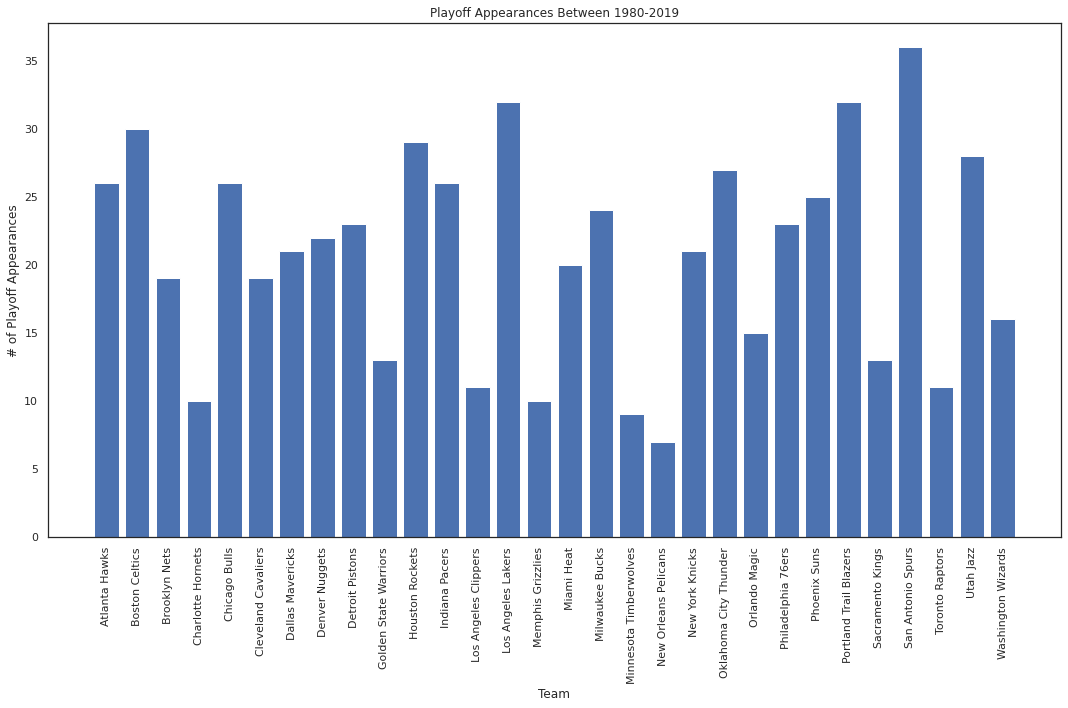

In [ ]:
# number of times a team appeared in the playoffs
compare_playoff_count(main_df)

## Comparing Playoff and Non-Playoff Team Stats

In [ ]:
# summary stats for Non-Playoff teams
main_df[main_df["Playoff"] == 0].describe()

,Rk,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Playoff,PPM,POSS,DRBP,DE,OE,ED,TR,EFG%,FTR
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.0,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,17.827083,80.666667,241.691250,38.050625,83.966458,0.452744,4.844792,14.071667,0.328087,33.208750,69.895208,0.475119,18.886667,25.226042,0.748975,12.503125,29.694583,42.194375,22.179792,7.842292,4.861875,15.836458,22.587708,99.833125,2001.337500,0.0,0.413072,94.463280,0.704173,108.154676,105.642269,-2.512407,1.291353,38.079724,0.300918
std,7.659323,5.787227,0.859217,3.069562,4.479214,0.018880,2.854819,7.823797,0.044257,4.891111,9.731274,0.019533,2.370167,3.064874,0.026776,1.920891,2.110490,2.129461,2.240169,1.019304,0.908476,1.805993,2.311936,6.508283,11.258893,0.0,0.027061,4.652048,0.014535,5.189513,3.387005,6.900874,0.124835,3.062499,0.036856
min,1.000000,50.000000,240.000000,30.800000,71.200000,0.401000,0.100000,1.000000,0.122000,25.300000,50.200000,0.421000,12.200000,16.600000,0.670000,7.900000,24.900000,35.800000,16.400000,5.500000,2.400000,11.500000,16.600000,81.900000,1980.000000,0.0,0.339130,82.275840,0.666997,90.019766,92.671837,-22.891332,0.970206,30.822816,0.193961
25%,12.000000,82.000000,241.200000,35.800000,80.700000,0.440750,2.800000,8.450000,0.317750,29.700000,63.100000,0.463000,17.200000,23.200000,0.730000,11.100000,28.400000,40.600000,20.600000,7.100000,4.200000,14.600000,20.900000,95.275000,1992.750000,0.0,0.393629,90.991680,0.695541,104.258723,103.668539,-7.350437,1.205510,35.853008,0.275736
50%,19.000000,82.000000,241.500000,37.600000,83.650000,0.450500,4.900000,14.350000,0.341000,31.400000,66.700000,0.474000,18.700000,25.100000,0.750000,12.300000,29.500000,42.000000,21.900000,7.700000,4.800000,15.600000,22.450000,99.300000,2002.000000,0.0,0.410383,93.680640,0.703528,108.801559,105.802659,-2.822134,1.283833,37.619555,0.300000
75%,24.000000,82.000000,242.100000,40.100000,87.000000,0.465000,6.600000,18.950000,0.354250,36.900000,77.050000,0.487000,20.300000,27.100000,0.768000,13.700000,30.800000,43.625000,23.700000,8.400000,5.500000,16.925000,24.100000,104.300000,2011.000000,0.0,0.431409,97.762560,0.712443,112.016834,107.727561,2.422652,1.363570,40.102779,0.325888
max,30.000000,82.000000,244.300000,47.700000,108.100000,0.506000,13.000000,37.000000,0.407000,46.700000,95.800000,0.543000,29.100000,37.200000,0.824000,18.500000,36.400000,49.400000,28.800000,12.000000,8.100000,21.500000,29.700000,121.800000,2019.000000,0.0,0.500411,113.226240,0.745420,123.883264,115.811314,18.022502,1.702078,47.705308,0.416116


In [ ]:
# summary stats for Playoff teams
main_df[main_df["Playoff"] == 1].describe()

,Rk,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Playoff,PPM,POSS,DRBP,DE,OE,ED,TR,EFG%,FTR
count,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.0,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000
mean,11.838141,80.766026,241.711378,39.293269,83.674199,0.469115,5.015545,14.095833,0.335497,34.280609,69.578365,0.492756,19.930609,26.297436,0.758288,12.376442,30.689423,43.064423,23.753526,8.231731,5.227244,15.312500,22.115865,103.535897,1999.961538,1.0,0.428362,94.253883,0.711100,108.438160,109.804602,1.366442,1.202824,39.323688,0.314683
std,7.624478,5.599220,0.826400,3.373571,4.769852,0.020532,3.217483,8.524297,0.049811,5.646112,11.037333,0.020959,2.607461,3.336864,0.029994,2.004627,1.999418,2.011632,2.686914,1.114757,0.968540,1.816989,2.313757,6.974049,11.327822,0.0,0.029069,5.001212,0.013125,5.642014,3.394133,7.274811,0.123289,3.363444,0.038796
min,1.000000,50.000000,240.000000,30.800000,71.300000,0.409000,0.100000,0.900000,0.104000,23.100000,41.900000,0.431000,13.500000,18.000000,0.660000,7.600000,25.100000,35.600000,15.600000,5.500000,3.300000,11.200000,16.800000,86.300000,1980.000000,1.0,0.357025,81.699840,0.668771,92.023396,100.071162,-18.269147,0.927094,30.825931,0.205950
25%,5.000000,82.000000,241.200000,36.600000,80.200000,0.454000,2.200000,6.800000,0.322750,30.000000,61.275000,0.479000,18.000000,23.875000,0.743000,10.800000,29.400000,41.700000,21.700000,7.500000,4.500000,14.000000,20.400000,98.200000,1990.000000,1.0,0.405618,90.231360,0.702819,104.057430,107.382212,-4.114171,1.112645,36.642496,0.290524
50%,11.000000,82.000000,241.500000,38.750000,83.300000,0.468000,5.000000,14.000000,0.351000,32.000000,66.050000,0.492000,19.600000,26.200000,0.759000,12.300000,30.400000,43.000000,23.600000,8.200000,5.100000,15.000000,21.900000,103.100000,2000.000000,1.0,0.426824,93.398400,0.709758,109.130346,109.753509,1.293183,1.191698,38.799781,0.315086
75%,18.000000,82.000000,242.100000,41.900000,87.100000,0.484000,7.100000,19.425000,0.367000,39.600000,79.975000,0.506000,21.700000,28.700000,0.779000,13.800000,31.825000,44.400000,25.700000,8.900000,5.800000,16.325000,23.800000,108.500000,2010.000000,1.0,0.449793,97.951680,0.719103,112.960729,112.208974,6.665047,1.286820,41.931944,0.342890
max,30.000000,82.000000,244.900000,48.500000,99.300000,0.545000,16.100000,45.400000,0.428000,48.200000,96.000000,0.565000,28.900000,36.300000,0.832000,18.400000,40.400000,49.700000,31.400000,12.800000,8.700000,22.800000,29.000000,126.500000,2019.000000,1.0,0.523160,110.760960,0.764695,124.756666,118.600223,22.598630,1.661323,48.502677,0.432215


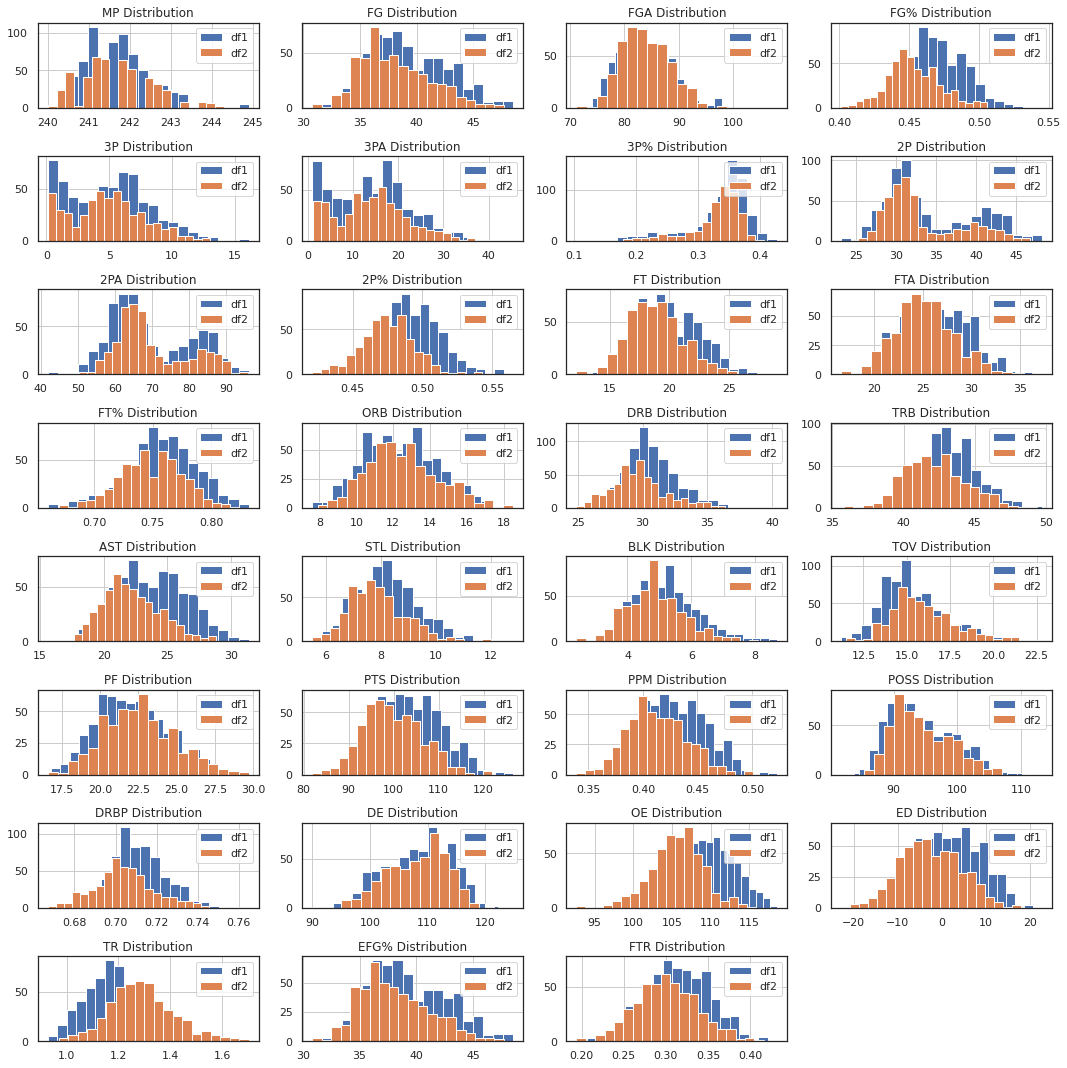

In [ ]:
# compare stats of playoff vs non-playoff teams of all time
all_float_vars = main_df.select_dtypes(include=["float64"]).columns
compare_two_groups(main_df[main_df["Playoff"] == 1], main_df[main_df["Playoff"] == 0], all_float_vars, 8, 4)

### Comparing Playoff and Non-Playoff Teams

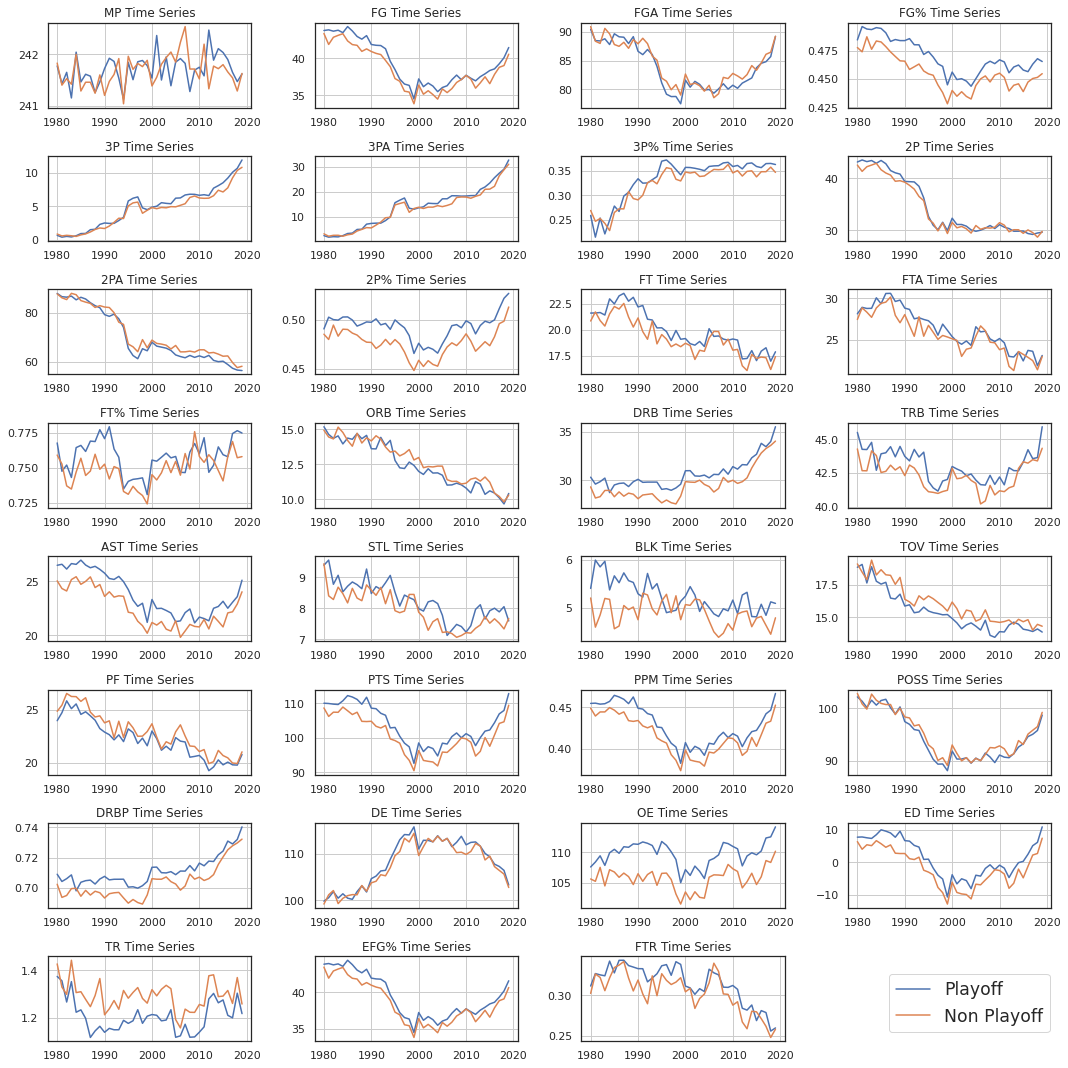

In [ ]:
all_float_vars = main_df.select_dtypes(include=["float64"]).columns
time_series_stat(main_df, all_float_vars, 8, 4)

#### Offensive Differences

Let's first take a look at offensive efficiency (OE) which measures the points scored per 100 possessions. Over time, playoff teams consistently have a greater OE than non playoff teams, even when OE was at its lowest during the 2000-2001 season. 

Let's understand the possession (POSS) part of OE because the lower it is, the greater OE a team has. To minimize POSS, the team has to have more field goals attempts (FGA), more free throw attempts (FTA), and less offensive rebounds (OR). 

Going back to OE, playoff teams:

1. score more points
2. attempt more field goals
3. attempt more free throws
4. have less offensive rebounds

An interesting stat is efficiency difference (ED) which subtracts, OE, from defensive efficiency (DE). This means the higher ED, the better a team is on offense than defense. Playoff teams have consistently had higher EDs, and if we take a look at the OE, and DE charts, teams had similar DE, but playoff teams had higher OE - this means that OE is a better indicator for playoffs than DE. 

Shot percentages give a good indication of a teams shot selection, and ability to make those shots. Playoff teams have consistently had higher FG%, and 2P%, even when both groups shoot the same number of shots, on average. 



#### Defensive Differences

Defensive rebounds provides quite a bit of insight to a teams defense. Having more defensive rebounds does not only reflect on the teams ability to rebound, but also the teams ability to contest the shot in order to get the rebound in the first place. 

The "defensive rebounding percentage"(DRBP) stat measures a teams ability to grab defensive rebounds, and playoff teams consistently have higher percentages. This difference results in playoff teams averaging 1 more defensive rebound than non playoff teams. However, this difference is getting smaller.

 Although it is a small difference, the accumulation of differences in other stats can make a huge difference. Next let's take a look at steals (STL) and blocks (BLK).

Surprisingly, there are small differences in STLs, and BLKs, even with some years where non playoff teams averaged more STLs and BLKs.  Even if the differences are as small as 1, these stats can matter most during the final seconds where the next basket can be the winning one. 

Last let's look at turnovers because many inferences can be made, such as a teams offensive ability, and a teams play making. Playoff teams have consistently had lower turnovers (TO) and turnover rates (TR). 
Playoff teams consistently have lower TRs resulting in an differences as large as 3, and as small as 1. 

### Summary

Putting everything together, the accumulation of small differences result in indicators between playoff and non playoff teams. Let's recap on what makes a playoff team:

- more points (PTS)
- more field goal attempts (FGA)
- more free throw attempts (FTA)
- less offensive rebounds (ORB)
- more defensive rebounds
- more steals (STL)
- more blocks (BLK)
- less turnovers (TO, TR)

## 1980's (OPTIONAL READ)

In [ ]:
decade_dict["1980's"].describe()

,Rk,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Playoff,PPM,POSS,DRBP,DE,OE,ED,TR,EFG%,FTR
count,231.000000,231.0,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,12.060606,82.0,241.537662,43.108658,88.845887,0.485234,1.008225,3.475758,0.267186,42.099567,85.374026,0.493242,22.075325,29.131602,0.757299,14.482251,29.291342,43.773160,25.809957,8.791342,5.370996,17.897403,24.933766,109.297403,1984.558442,0.623377,0.452506,100.875786,0.701661,101.128954,108.344543,7.215589,1.272535,43.114331,0.328411
std,6.695603,0.0,0.692451,2.044593,3.412874,0.016087,0.737547,1.973150,0.053750,2.197222,3.786098,0.016292,2.187523,2.496763,0.025565,1.244950,1.497625,1.807729,2.005890,1.076110,1.142986,1.568797,1.835539,4.941809,2.886973,0.485591,0.020409,2.997215,0.010778,2.972841,3.555771,4.707078,0.145060,2.044273,0.031261
min,1.000000,82.0,240.000000,38.800000,80.400000,0.443000,0.100000,0.900000,0.104000,37.000000,75.600000,0.452000,17.100000,23.300000,0.686000,11.300000,25.600000,39.200000,20.600000,6.300000,2.600000,14.400000,19.400000,97.100000,1980.000000,0.000000,0.403072,94.083840,0.673126,92.023396,97.874323,-5.004659,0.927094,38.808706,0.247346
25%,6.000000,82.0,241.200000,41.900000,86.800000,0.474000,0.500000,2.000000,0.227500,40.500000,83.050000,0.482000,20.550000,27.450000,0.740000,13.600000,28.300000,42.650000,24.500000,8.000000,4.600000,16.700000,23.750000,106.150000,1982.000000,0.000000,0.439281,99.027840,0.694794,99.334715,105.983334,4.264842,1.167255,41.903474,0.305748
50%,12.000000,82.0,241.500000,43.000000,88.500000,0.485000,0.800000,2.900000,0.269000,42.100000,85.300000,0.492000,22.100000,29.000000,0.758000,14.400000,29.400000,43.900000,25.700000,8.700000,5.200000,17.900000,24.900000,108.800000,1985.000000,1.000000,0.451466,100.561920,0.702819,101.356454,108.216041,6.790991,1.270382,43.004000,0.329099
75%,18.000000,82.0,242.100000,44.300000,90.800000,0.495000,1.300000,4.500000,0.310500,43.500000,87.500000,0.503000,23.600000,30.800000,0.775000,15.300000,30.300000,45.000000,27.200000,9.500000,6.100000,18.950000,26.250000,112.100000,1987.000000,1.000000,0.464552,102.608640,0.709078,102.926609,110.846599,10.179166,1.359465,44.305944,0.347301
max,25.000000,82.0,243.700000,48.500000,99.300000,0.545000,4.700000,14.000000,0.384000,48.200000,96.000000,0.555000,29.100000,37.200000,0.821000,17.400000,33.600000,49.500000,31.400000,11.700000,8.700000,22.800000,29.700000,126.500000,1989.000000,1.000000,0.523160,110.760960,0.729935,108.335285,117.022679,22.598630,1.676999,48.502677,0.415423


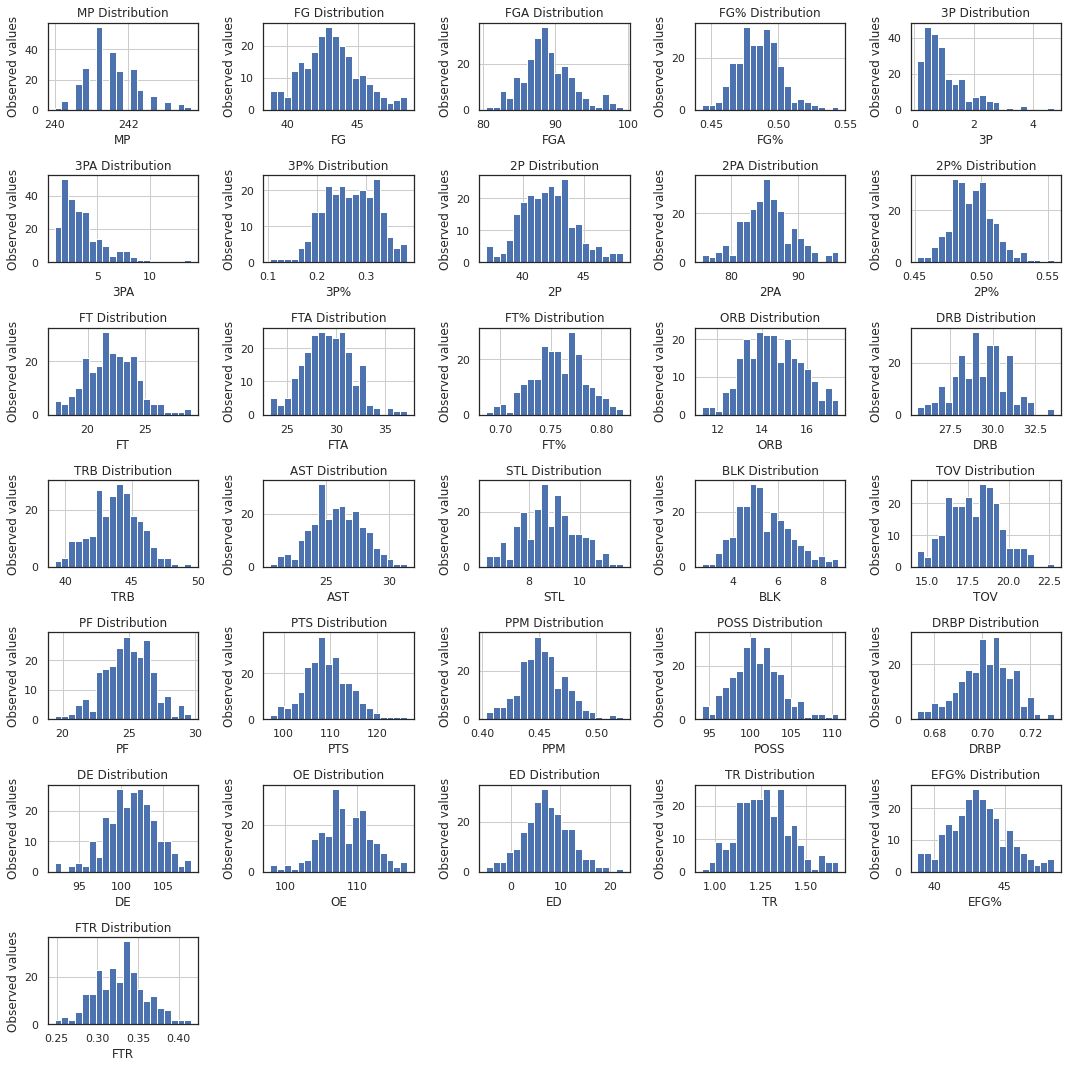

In [ ]:
single_histogram(decade_dict["1980's"], all_float_vars)

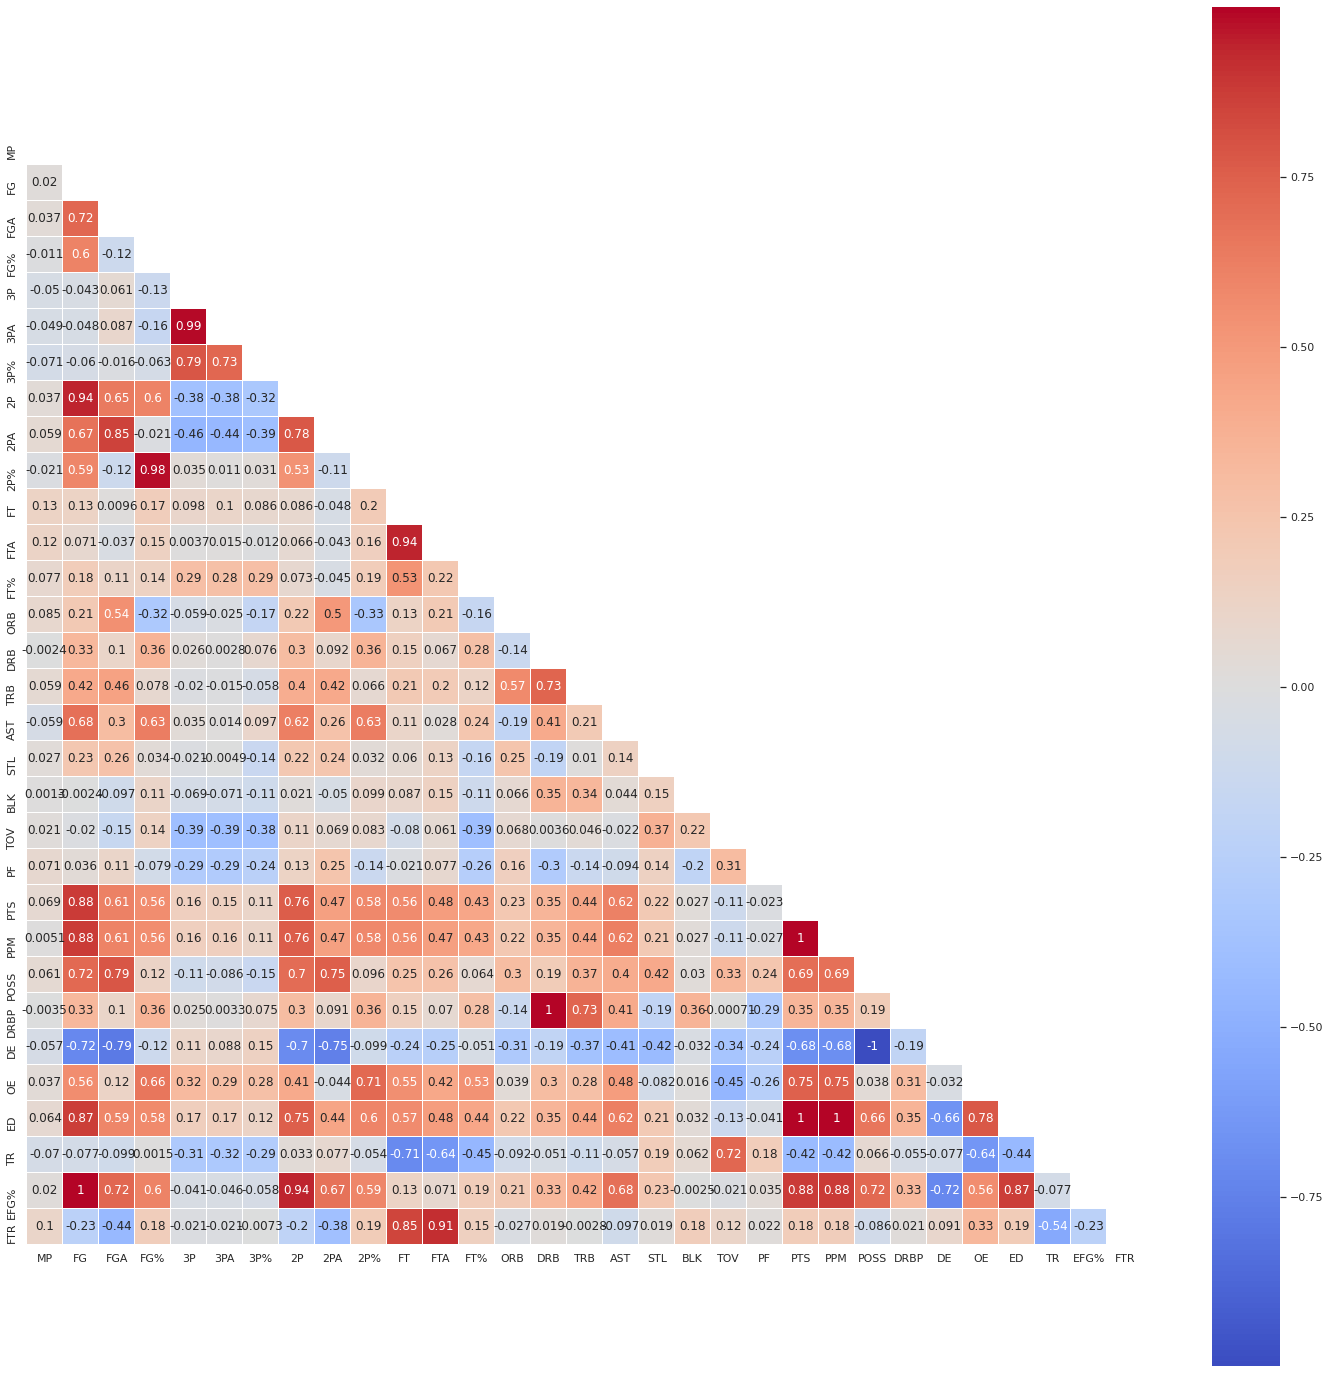

In [ ]:
single_heatmap(decade_dict["1980's"])

In [ ]:
count_decade_playoffs(decade_dict["1980's"])

,Team,Playoff
0,Atlanta Hawks,8
1,Boston Celtics,10
2,Brooklyn Nets,5
3,Charlotte Hornets,0
4,Chicago Bulls,6
5,Cleveland Cavaliers,3
6,Dallas Mavericks,5
7,Denver Nuggets,8
8,Detroit Pistons,6
9,Golden State Warriors,2


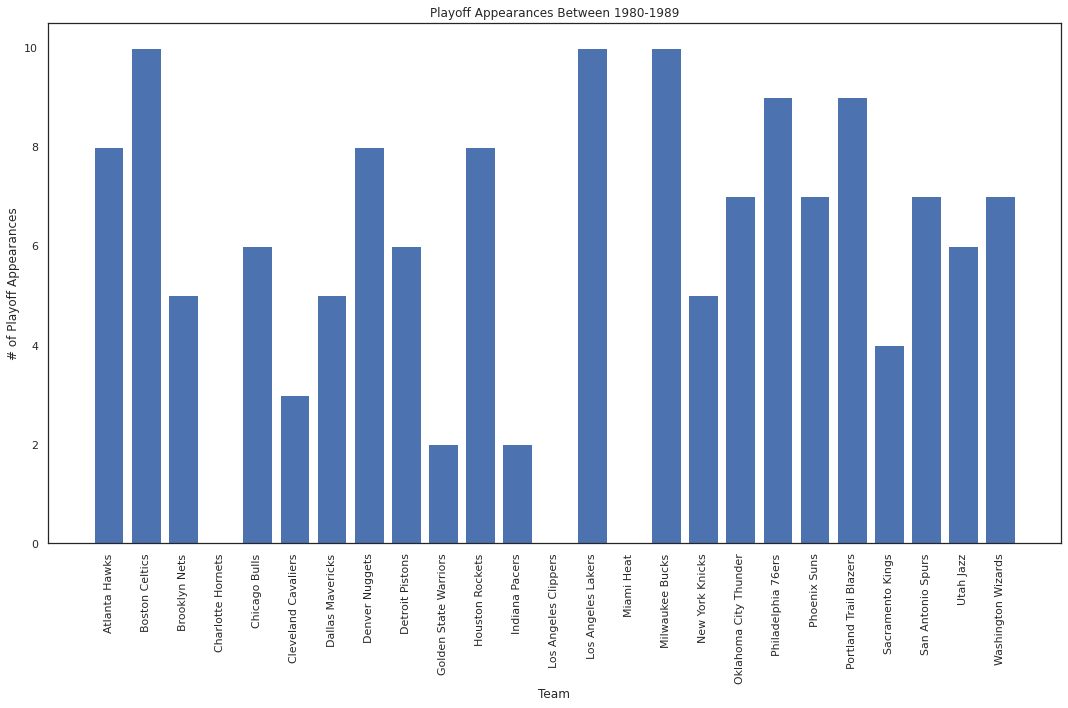

In [ ]:
compare_playoff_count(decade_dict["1980's"])

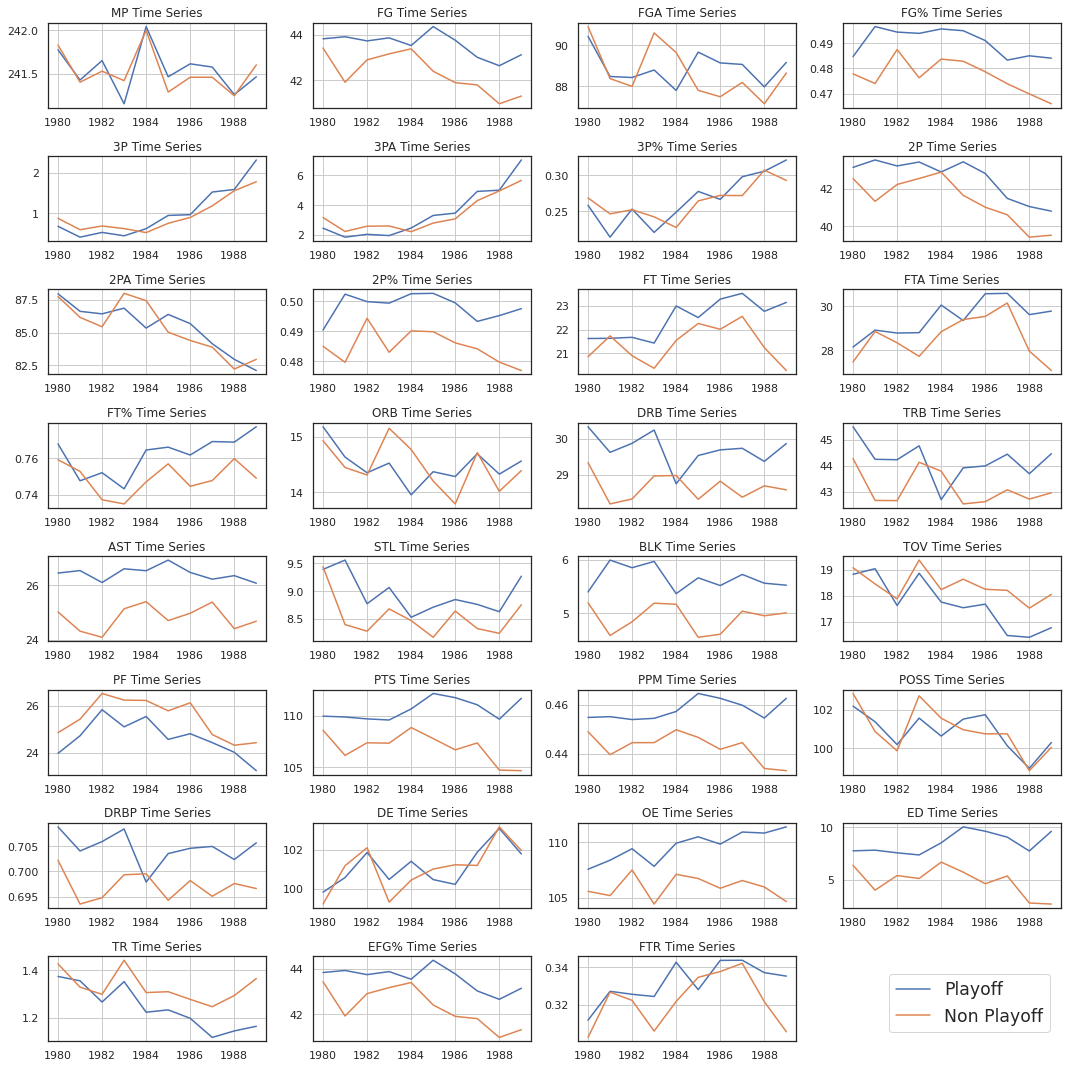

In [ ]:
time_series_stat(decade_dict["1980's"],all_float_vars, 8,4)

# Modeling

Before modeling, the data set was broken up into a training set, and testing, where each model will 'learn' from the training set, and tested with the test set. To measure each models performance on the test set, precision, recall, F1 score, and accuracy will be measured. 

## Baseline Models

In [ ]:
modelling_data = main_df.drop(["Year","Team", "G","Rk"], axis=1)
predictors_data = modelling_data.drop(["Playoff"], axis=1)
labels = modelling_data.pop("Playoff")

To demonstrate optimization, a baseline of each model will be created using the default hyperparameters found in the scikit-learn documentation. Afterwards each model will be optimized based on precision. 

Logistic, Random Forests, and Support Vector Machines (SVMs) models were chosen because each have the ability to classify groups, and are simple to use and optimize thanks to scikit-learn. 

Each model will have their default hyperparameters, each will use the same training set, and will be will be using the same test set. Additionally, the default parameters can be found at the end of each model cell.   

###Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split

# split training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictors_data, labels, test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# define logistic regression
log_clf = LogisticRegression(random_state=42)

# create pipeline - preprocess data
baseline_log_clf = Pipeline(steps=[
                       ("scaler", StandardScaler()), 
                       ("logistic", log_clf)
                       ])
# train model
baseline_log_clf.fit(X_train, y_train)
# test model
baseline_log_clf_score = baseline_log_clf.score(X_test, y_test)
# current parameters 
print("Current Hyperparameters:",log_clf.get_params)

Current Hyperparameters: <bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>


###Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# define logistic regression
rnd_clf = RandomForestClassifier(random_state=42)

baseline_rnd_clf = rnd_clf.fit(X_train, y_train)
baseline_rnd_clf_score = baseline_rnd_clf.score(X_test, y_test)
print("Current Hyperparameters:", rnd_clf.get_params)

Current Hyperparameters: <bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>


### Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
# define SVM
svm_clf = SVC(random_state=42, probability=True)



baseline_svm_clf = Pipeline(steps=[
                       ("scaler", StandardScaler()), 
                       ("svm", svm_clf)
                       ])
baseline_svm_clf.fit(X_train, y_train)
baseline_svm_clf_score = baseline_svm_clf.score(X_test, y_test)
print("Current Hyperparameters:", svm_clf.get_params)

Current Hyperparameters: <bound method BaseEstimator.get_params of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)>


###Baseline Performance Metrics

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

baseline_metric_data = {
	  					"Model": [],
                        "Precision": [],
						"Recall": [],
						"F1 Score": [],
						"Accuracy": [],
						        		}
for clf in (baseline_log_clf, baseline_rnd_clf, baseline_svm_clf):
	clf.fit(X_train, y_train)
	y_pred = clf.predict(X_test)
	try: 
		if (clf[1] and clf.__class__.__name__ == "Pipeline"):
			baseline_metric_data["Model"].append(clf[1].__class__.__name__)
			baseline_metric_data["Precision"].append(precision_score(y_test, y_pred))
			baseline_metric_data["Recall"].append(recall_score(y_test, y_pred))
			baseline_metric_data["F1 Score"].append(f1_score(y_test, y_pred))
			baseline_metric_data["Accuracy"].append(accuracy_score(y_test, y_pred))
		else: 
			baseline_metric_data["Model"].append(clf[0][1])
			baseline_metric_data["Precision"].append(precision_score(y_test, y_pred))
			baseline_metric_data["Recall"].append(recall_score(y_test, y_pred))
			baseline_metric_data["F1 Score"].append(f1_score(y_test, y_pred))
			baseline_metric_data["Accuracy"].append(accuracy_score(y_test, y_pred))
	except:
			baseline_metric_data["Model"].append(clf.__class__.__name__)
			baseline_metric_data["Precision"].append(precision_score(y_test, y_pred))
			baseline_metric_data["Recall"].append(recall_score(y_test, y_pred))
			baseline_metric_data["F1 Score"].append(f1_score(y_test, y_pred))
			baseline_metric_data["Accuracy"].append(accuracy_score(y_test, y_pred))

baseline_metric_table = pd.DataFrame(data=baseline_metric_data)
baseline_metric_table

,Model,Precision,Recall,F1 Score,Accuracy
0,LogisticRegression,0.858333,0.851240,0.854772,0.841629
1,RandomForestClassifier,0.830645,0.851240,0.840816,0.823529
2,SVC,0.878049,0.892562,0.885246,0.873303


The default parameters for each model do a good job on all metrics with scores all close to or above 80%. With some tweaking, these scores can be improved.

##Optimizing Models

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

clf_scorer = {
    'precision' : make_scorer(precision_score),
    'recall' : make_scorer(recall_score),
    'f1_score' : make_scorer(f1_score),
    'accuracy' : make_scorer(accuracy_score)
}

refit = 'precision'

To optimize each model, GridSearchCV found in scikit-learn creates multiple models by using the combinations formed from the hyperparameters passed in. The best model is selected based on the scorer specified. 

Precision was chosen to score the model because out of all the teams that were classified as a playoff team, I wanted to know how many of those were really playoff teams. False negatives are tolerable because there are years where the battle for 8th seed is close.

### Logisitic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


op_log_clf_pipeline = Pipeline(
    steps= [
     ('standard_scaler', StandardScaler()),
     ('op_logistic', log_clf) # log_clf = LogisticRegression(random_state=42), from base model
    ]
)

param_grid = {
    'op_logistic__penalty' : ['l1', 'l2', 'elasticnet'],
    'op_logistic__C' : (list(np.logspace(-4, 4, 10)) + [1, 10, 100]),
    'op_logistic__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'op_logistic__max_iter' : [100, 500, 1000, 2000]
}

op_log_clf_scorer = clf_scorer

op_log_clf_gridCV = GridSearchCV(
    estimator = op_log_clf_pipeline,
    scoring = op_log_clf_scorer,
    param_grid = param_grid,
    verbose = True,
    n_jobs = -1,
    return_train_score = True,
    refit = refit,
    cv = 3
)

op_log_clf = op_log_clf_gridCV.fit(X_train, y_train)

Fitting 3 folds for each of 780 candidates, totalling 2340 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 1409 tasks      | elapsed:   57.9s
[Parallel(n_jobs=-1)]: Done 1984 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2340 out of 2340 | elapsed:  3.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
new_log_clf = op_log_clf.best_estimator_

print("OLD PARAMETERS: \n", baseline_log_clf.get_params , "\n")

print("NEW PARAMETERS: \n", new_log_clf.get_params)

OLD PARAMETERS: 
 <bound method Pipeline.get_params of Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logistic',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)> 

NEW PARAMETERS: 
 <bound method Pipeline.get_params of Pipeline(memory=None,
         steps=[('standard_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('op_logistic',
                 LogisticRegression(C=21.54434690031882, cl

### Random Forests

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer

# were imported in logistic regression optimization
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import f1_score
# from sklearn.metrics import accuracy_score


op_rnd_clf_pipeline = RandomForestClassifier(random_state=42)

op_rnd_clf_param_grid = {
    'bootstrap' : [True, False],
    'max_depth' : (list(np.linspace(10,100,10)) + [None]),
    'criterion' : ['gini', 'entropy'],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'oob_score' : [True, False],
}

op_log_clf_scorer = clf_scorer

op_rnd_clf_gridCV = GridSearchCV(
    estimator = op_rnd_clf_pipeline,
    scoring = op_log_clf_scorer,
    param_grid = op_rnd_clf_param_grid,
    verbose = True,
    n_jobs = -1,
    return_train_score = True,
    refit = refit,
    cv = 3
)

op_rnd_clf = op_rnd_clf_gridCV.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 264 candidates, totalling 792 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 792 out of 792 | elapsed:  2.8min finished


In [ ]:
new_rnd_clf = op_rnd_clf.best_estimator_

print("OLD PARAMETERS: \n", baseline_rnd_clf.get_params , "\n")

print("NEW PARAMETERS: \n", new_rnd_clf[0].get_params)

OLD PARAMETERS: 
 <bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)> 

NEW PARAMETERS: 
 <bound method BaseEstimator.get_params of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=20.0, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_

For the optimal Random Forest model, "max_depth" was set to 20, and "max_features" was set to "log2"

### Support Vector Machine (SVM)

In [ ]:
op_svm_clf_pipeline = Pipeline(
    steps= [
        ("scaler", StandardScaler()), 
        ('op_svm', svm_clf) # svm_clf = SVC(random_state=42), from base model
    ]
)

op_svm_clf_param_grid = {
    'op_svm__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'op_svm__degree' : [1,2,3,4,5],
    'op_svm__gamma' : ['scale', 'auto'],
    'op_svm__decision_function_shape' : ['ovo', 'ovr'],
    'op_svm__C' : [0.001, 0.01, 0.1, 1, 10]

}

op_svm_clf_scorer = clf_scorer

op_svm_clf_gridCV = GridSearchCV(
    estimator = op_svm_clf_pipeline,
    scoring = op_svm_clf_scorer,
    param_grid = op_svm_clf_param_grid,
    verbose = True,
    n_jobs = -1,
    return_train_score = True,
    refit = refit,
    cv = 3
)

op_svm_clf = op_svm_clf_gridCV.fit(X_train, y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  2.0min finished


In [ ]:
new_svm_clf = op_svm_clf.best_estimator_

print("OLD PARAMETERS: \n", baseline_svm_clf[1].get_params , "\n")

print(new_svm_clf[1].get_params)

OLD PARAMETERS: 
 <bound method BaseEstimator.get_params of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)> 

<bound method BaseEstimator.get_params of SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=1, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)>


For the optimal SVM model, "decision_function_shape" was set to "ovo" (one vs one), "degree" set to 1, and kernel set to "linear".


### Results

In [ ]:
op_baseline_metric_data = {
	  					"Model": [],
                        "Precision": [],
						"Recall": [],
						"F1 Score": [],
						"Accuracy": [],
						        		}
for clf in (baseline_log_clf, new_log_clf, baseline_rnd_clf, new_rnd_clf, baseline_svm_clf, new_svm_clf):
	clf.fit(X_train, y_train)
	y_pred = clf.predict(X_test)
	try: 
		if (clf[1] and clf.__class__.__name__ == "Pipeline"):
			op_baseline_metric_data["Model"].append(clf[1].__class__.__name__)
			op_baseline_metric_data["Precision"].append(precision_score(y_test, y_pred))
			op_baseline_metric_data["Recall"].append(recall_score(y_test, y_pred))
			op_baseline_metric_data["F1 Score"].append(f1_score(y_test, y_pred))
			op_baseline_metric_data["Accuracy"].append(accuracy_score(y_test, y_pred))
		else: 
			op_baseline_metric_data["Model"].append(clf[0][1])
			op_baseline_metric_data["Precision"].append(precision_score(y_test, y_pred))
			op_baseline_metric_data["Recall"].append(recall_score(y_test, y_pred))
			op_baseline_metric_data["F1 Score"].append(f1_score(y_test, y_pred))
			op_baseline_metric_data["Accuracy"].append(accuracy_score(y_test, y_pred))
	except:
			op_baseline_metric_data["Model"].append(clf.__class__.__name__)
			op_baseline_metric_data["Precision"].append(precision_score(y_test, y_pred))
			op_baseline_metric_data["Recall"].append(recall_score(y_test, y_pred))
			op_baseline_metric_data["F1 Score"].append(f1_score(y_test, y_pred))
			op_baseline_metric_data["Accuracy"].append(accuracy_score(y_test, y_pred))

op_baseline_metric_table = pd.DataFrame(data=op_baseline_metric_data)
op_baseline_metric_table

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


,Model,Precision,Recall,F1 Score,Accuracy
0,LogisticRegression,0.858333,0.851240,0.854772,0.841629
1,LogisticRegression,0.850000,0.842975,0.846473,0.832579
2,RandomForestClassifier,0.830645,0.851240,0.840816,0.823529
3,RandomForestClassifier,0.833333,0.867769,0.850202,0.832579
4,SVC,0.878049,0.892562,0.885246,0.873303
5,SVC,0.861789,0.876033,0.868852,0.855204


The Random Forests, and SVM model were able to improve significantly, with a 1-2% increase. The logistic model did not improve as much, with differences of <1%. The hyperparameter changes can be found under the cell of each model. 

### Sample Prediction

In [ ]:
x = 0
random_team = main_df.iloc[x].drop(["Year","Team", "G","Rk", "Playoff"])
main_df.iloc[x]

Rk                         1
Team       San Antonio Spurs
G                         82
MP                     240.9
FG                        47
FGA                     94.4
FG%                    0.498
3P                       0.6
3PA                      2.5
3P%                    0.252
2P                      46.4
2PA                     91.9
2P%                    0.505
FT                      24.7
FTA                     30.8
FT%                    0.801
ORB                     14.1
DRB                     30.7
TRB                     44.7
AST                     28.4
STL                      9.4
BLK                      4.1
TOV                     19.4
PF                      25.6
PTS                    119.4
Year                    1980
Playoff                    1
PPM                 0.495641
POSS                 108.722
DRBP                0.711776
DE                   93.7493
OE                   109.821
ED                   16.0722
TR                   1.29558
EFG%          

In [ ]:
year1 = 1980
name1 = "Los Angeles Lakers"
team1 = main_df[(main_df["Year"] == year1) & (main_df["Team"] == name1)]
team1 = team1.drop(["Year","Team", "G","Rk", "Playoff"], axis=1)
team1

,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PPM,POSS,DRBP,DE,OE,ED,TR,EFG%,FTR
1,242.4,47.5,89.9,0.529,0.2,1.2,0.2,47.3,88.6,0.534,19.8,25.5,0.775,13.2,32.4,45.6,29.4,9.4,6.7,20.0,21.8,115.1,0.474835,103.6032,0.722706,98.381128,111.096955,12.715827,1.585666,47.501112,0.283648


In [ ]:
random_team_vals = np.array(team1.values.tolist()).reshape(-1,31)
prob = new_svm_clf.predict_proba(random_team_vals)
print(new_svm_clf.classes_,"\n",prob)
print(prob.sum())

[0 1] 
 [[0.00477408 0.99522592]]
0.9999999999999999


the 1980-81 San Antonio Spurs had a 64.0% chance of making the playoffs

### Feature Importance

The goal of feature importance is to determine which variables are good at predicting a certain class. However depending on the model, these values have to be interpreted differently. 

#### Logsitic and SVM 

In logistic regression and SVMs, the sign (+/-), and magnitude of the coefficients determine what class it predicts, and how well. For example, STL is a good predictor for class 1 (i.e. playoff teams), while POSS is a good predictor for class 0 (i.e. non playoff teams). 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


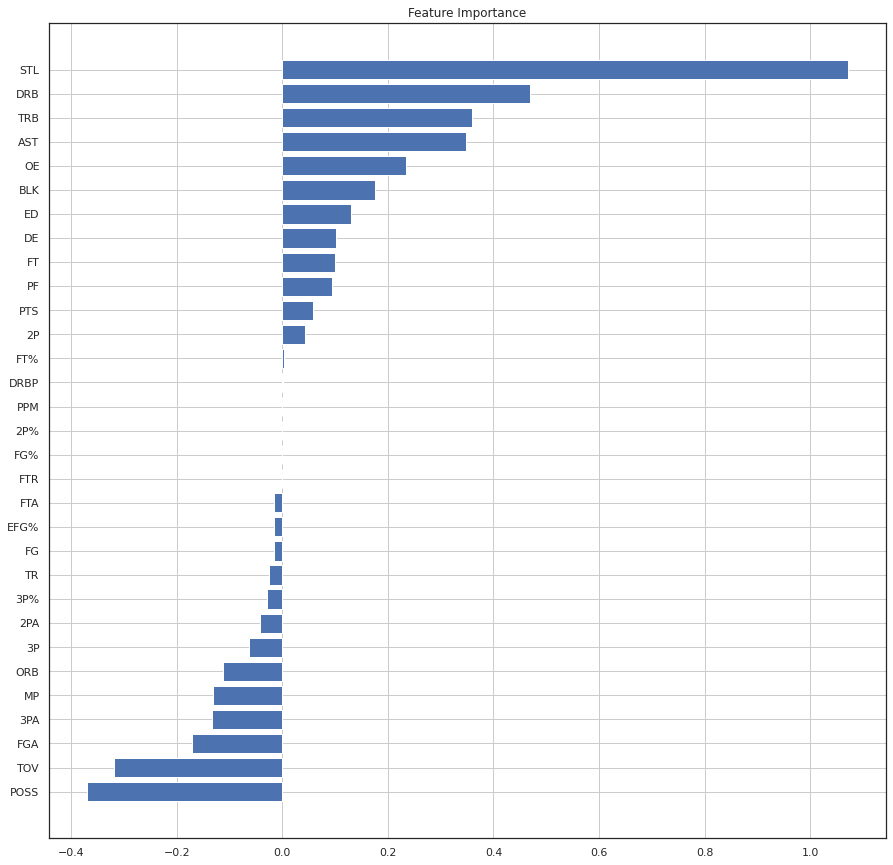

In [ ]:
log_importance = new_log_clf[1].fit(X_train, y_train)
f_importances(log_importance.coef_, all_float_vars)

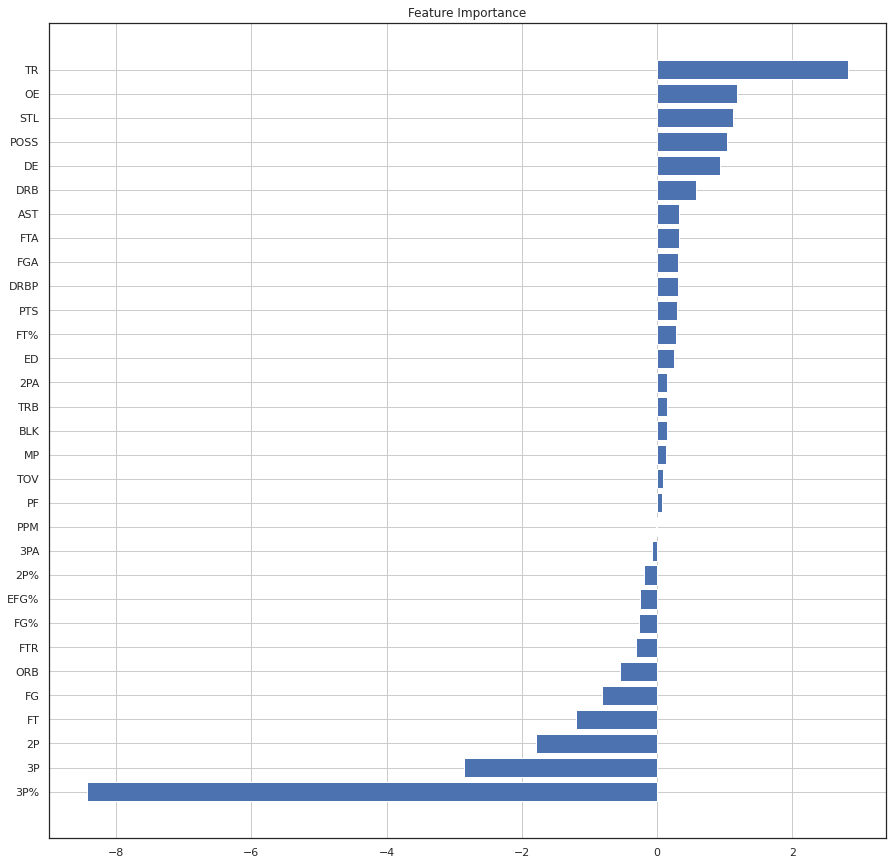

In [ ]:
svm_importance = new_svm_clf[1].fit(X_train, y_train)
f_importances(svm_importance.coef_, all_float_vars) # will not work if kernel is not linear

#### Random Forest Model

Random forests score the features based on how well it purely classifies, and not how well it classifies positive and negative classes. The larger the value, the larger contribution the feature had in the classification decision. 

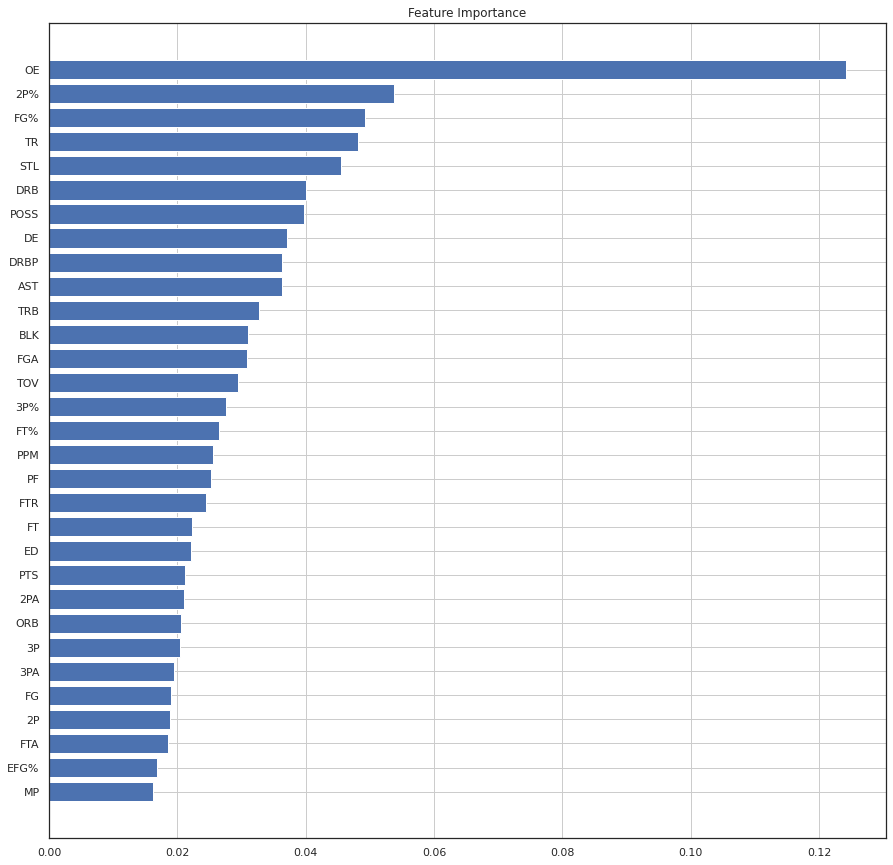

In [ ]:
forest_importance = new_rnd_clf.feature_importances_

feats = {}
for feature, importance in zip(all_float_vars, forest_importance):
    feats[feature] = importance

f_names = list(feats.keys())
f_vals = [list(feats.values())]

f_importances(f_vals, f_names)

#### Results

Based on the logistic, and SVM models these features are good indicators for playoff teams:

- STL
- TRB
- OE
- DE

and these features are good at indicating non playoff teams:

- TR
- ORB
- FGA
- 3PA

Based on the random forest model these features are most useful in classification:

- OE
- TE
- 2P%
- FG%
- STL
- TRB
- DE

# Conclusion

Basketball is a forever changing game, with changes to rules, meta positions (what positions are most dominant), and different coaching strategies, but there will be certain fundamentals that great teams focus on.

Some teams are able to focus and develop the fundamentals that make a great team, and by doing so are able to make the playoffs. On the other hand, non playoff teams might not have the talent, or cap space to acquire and develop their players. 

Overall if teams focus their resources, whether it be coaching staff, or players, to develop skills to **increase their steals, rebounds, offensive efficiency, and defensive efficiency,** it would make the team more competitive for a playoff spot.